In [ ]:
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.time import Time

In [3]:
tpf = lk.read("D:/works/Projects_Works/Astro/Lightcurves/Stars/MAST_2024-11-26T1202/MAST_2024-11-26T1202/TESS/tess2019306063752-s0018-0000000292404647-0162-s/tess2019306063752-s0018-0000000292404647-0162-s_tp.fits")
lc = tpf.to_lightcurve(aperture_mask = tpf.pipeline_mask)
lc.meta

{'APERTURE_MASK': array([[False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False,  True,  True, False, False,
         False, False],
        [False, False, False, False,  True,  True,  True,  True, False,
         False, False],
        [False, False, False, False,  True,  True,  True,  True,  True,
         False, False],
        [False, False, False, False,  True,  True,  True,  True,  True,
         False, False],
        [False, False, False, False,  True,  True,  True, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, 

In [4]:
lc.columns

<TableColumns names=('time','flux','flux_err','centroid_col','centroid_row','cadenceno','quality')>

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

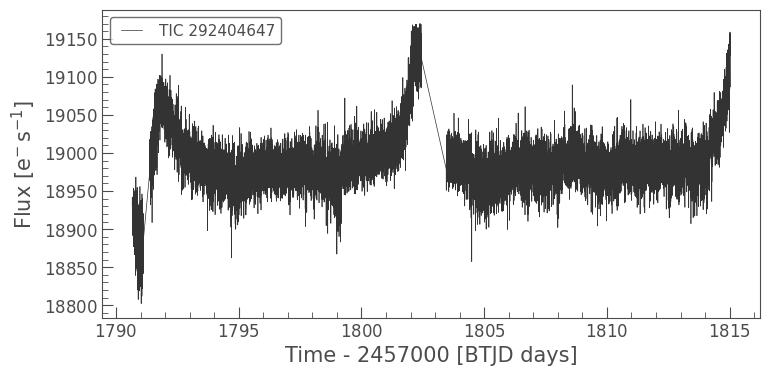

In [15]:
lc = lc.remove_outliers()
lc.plot()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

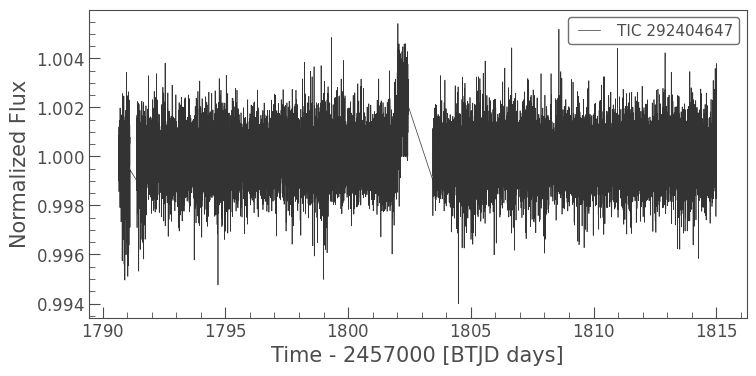

In [14]:
flat_lc = lc.flatten()
flat_lc.plot()

<Axes: xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

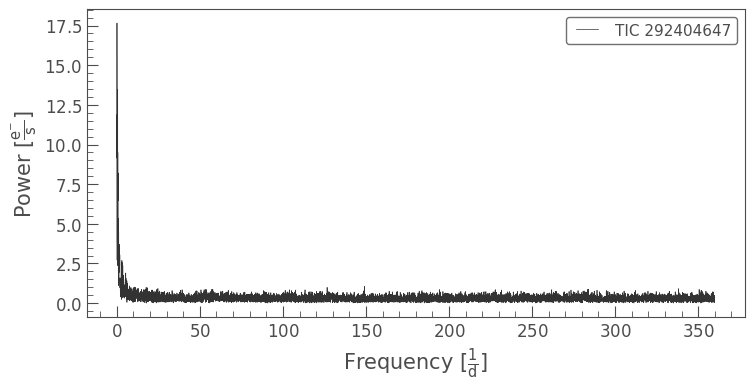

In [12]:
pg = lc.to_periodogram(oversample_factor = 1)
pg.plot()

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

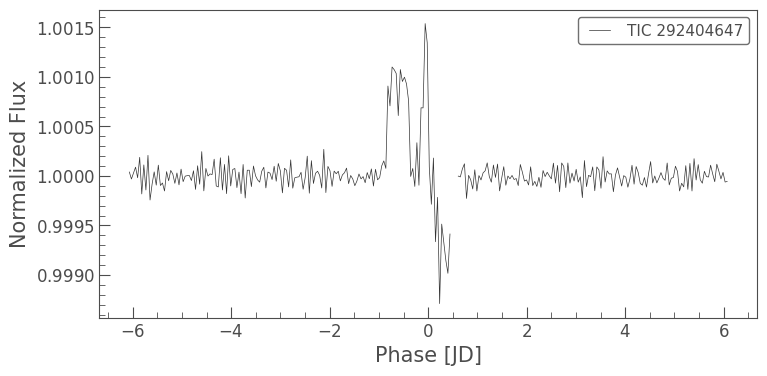

In [13]:
fold_lc = flat_lc.fold(period = pg.period_at_max_power)
fold_lc.bin(time_bin_size = 0.042).plot()